In [46]:
# uncomment and run this cell if you don't have these modules installed (if pip 3 doesn't work, you can use just pip)
# !pip3 install sklearn
# !pip3 install pandas
# !pip3 install seaborn

In [54]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
# retrieved dataset from an online archive instead of loading from sklearn dataset, 
# you can also load directly from sklearn - but I did not want to deal with turning that into a dataframe.
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# this online data did not have column names so this is naming the columns manually
columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']

# read the csv into a pandas dataframe
iris = pd.read_csv(url, names=columns)

#check how our data looks
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Some Simple Visualizations

Here is a good [reference](https://pandas.pydata.org/pandas-docs/version/0.16.2/visualization.html) for some of the more simple visualizations you can use.

### 1. Plot
Since our data is continuous, using a simple plot function gives us a nice comparison of our different continuous columns.

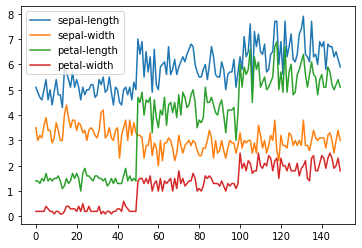

In [61]:
iris.plot()
plt.show()

### 3. Histogram
Here, we can see our distribution of data separated by bins of values. We can also set the transparency to .5 (using the parameter a) so as to make everything more visible.

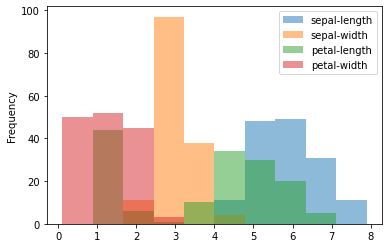

In [62]:
iris.plot(kind='hist', alpha=0.5)
plt.show()

### 3. Boxplot
Boxplots are good if you want to look at the distribution of data more in depth by dividing into four sections that each contain approx. 25% of the data. This is more useful to look at specifics of mean, outliters, dispersion.

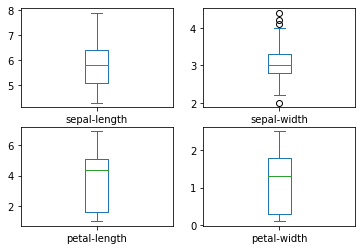

In [57]:
iris.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

## More Complex Graphs including Multivariate Plots

### 1. Pairplot (seaborns)
From the [documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html) - *Plot pairwise relationships in a dataset. By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.*

What this essentially means is (for this data at least) every graph but the ones on the diagonal show a scatterplot of the two x and y variables, while the graphs on the diagonal are just a distribution graph of the one variable. This is really useful for datasets where we want to look at multiple continuous distributions and how they relate to one another.

Here we looked at a pairplot that uses kernel density estimation (KDE) for the diagonal plots. KDE is one way to look at the probability density function of a random variable

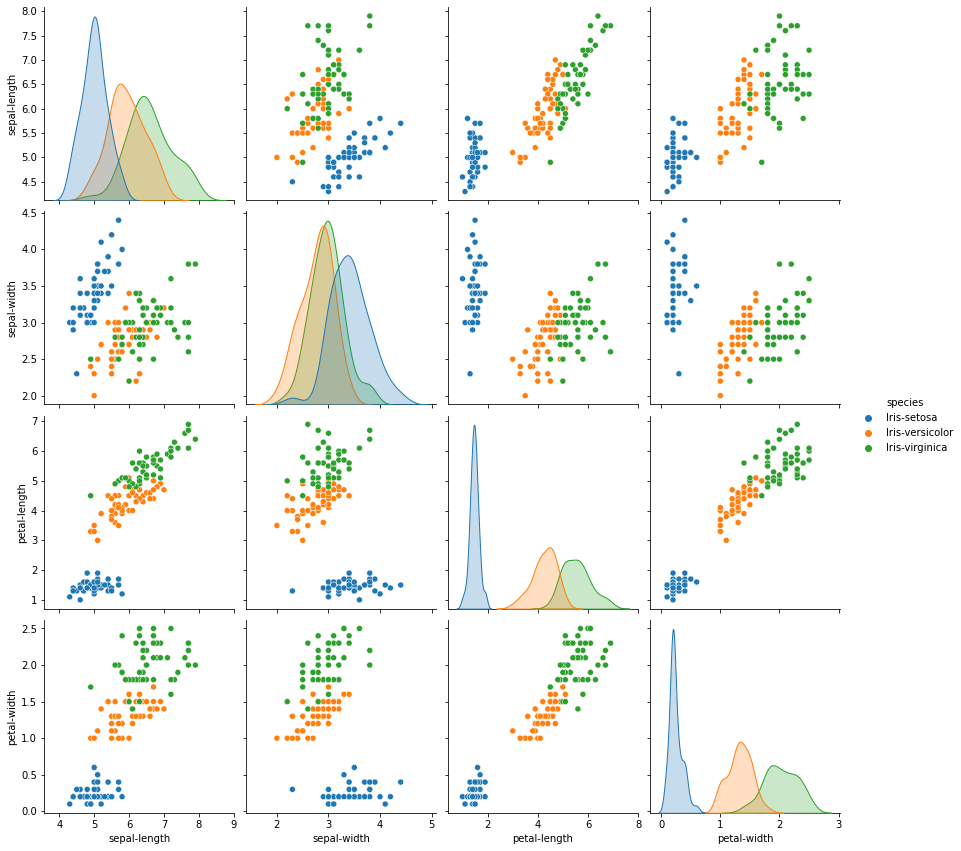

In [44]:
sns.pairplot(iris, hue="species", height=3, diag_kind="kde");


### 1. PairGrid (seaborns)
From the [documentation](http://seaborn.pydata.org/generated/seaborn.PairGrid.html) - *This object maps each variable in a dataset onto a column and row in a grid of multiple axes. Different axes-level plotting functions can be used to draw bivariate plots in the upper and lower triangles, and the the marginal distribution of each variable can be shown on the diagonal.*

You should use PairGrid when you want more flexibility for the types of graphs you want to see. Here we can set different types of graphs for our lower and upper triangles as well as the diagonal. One additional note, we have to assign our graph to a variable to use the functions that PairGrid provides us.

If you want to learn more about pairplots and pairgrids, this is a great [explanation](https://towardsdatascience.com/pair-plot-and-pairgrid-in-details-f782975032ea) with more examples.

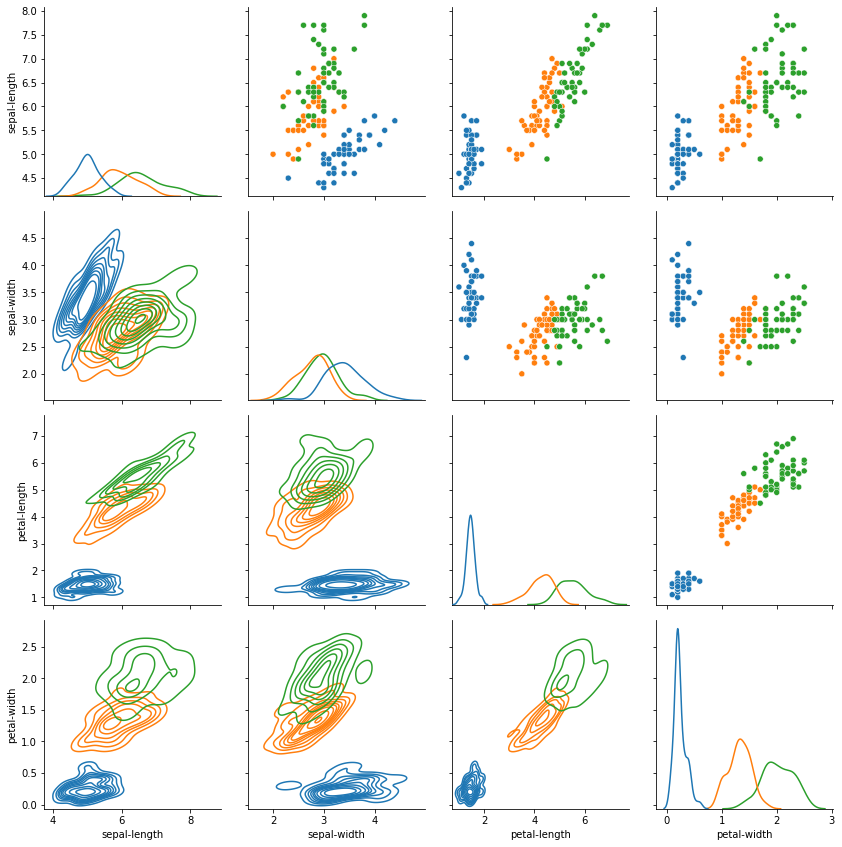

In [56]:
x = sns.PairGrid(iris, hue="species", height=3)
x.map_upper(sns.scatterplot)
x.map_lower(sns.kdeplot)
x.map_diag(sns.kdeplot)
plt.show()